# New York City Yellow Taxi Analysis


In [1]:
import pandas as pd
import folium
import datetime
import time 
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams
import math
from matplotlib.dates import date2num
from matplotlib.pyplot import plot_date

# Data Information

<p>
Ge the data from : http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml (2016 data)
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) 
</p>

## Information on taxis:

<h5> Yellow Taxi: Yellow Medallion Taxicabs</h5>
<p> These are the famous NYC yellow taxis that provide transportation exclusively through street-hails. The number of taxicabs is limited by a finite number of medallions issued by the TLC. You access this mode of transportation by standing in the street and hailing an available taxi with your hand. The pickups are not pre-arranged.</p>

<h5> For Hire Vehicles (FHVs) </h5>
<p> FHV transportation is accessed by a pre-arrangement with a dispatcher or limo company. These FHVs are not permitted to pick up passengers via street hails, as those rides are not considered pre-arranged. </p>

<h5> Green Taxi: Street Hail Livery (SHL) </h5>
<p>  The SHL program will allow livery vehicle owners to license and outfit their vehicles with green borough taxi branding, meters, credit card machines, and ultimately the right to accept street hails in addition to pre-arranged rides. </p>
<p> Credits: Quora</p>

<h5>Note:</h5>
In the given notebook we are considering only the yellow taxis for the time period between Jan - Mar 2015 & Jan - Mar 2016

# Data Collection
We Have collected all yellow taxi trips data of jan-2015
<table>
<tr>
<th> file name </th>
<th> file name size</th>
<th> number of records </th>
<th> number of features </th>
</tr>
<tr>
<td> yellow_tripdata_2015-01 </td>
<td> 1.84 G </td>
<td> 12748986 </td>
<td> 19 </td>
</tr>
</table>

In [2]:
#month = pd.read_csv('yellow_tripdata_2015-01.csv')
df = pd.read_csv('xaa')
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6249999 entries, 0 to 6249998
Data columns (total 19 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(12), int64(4), object(3)
memory usage: 906.0+ MB


In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [6]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
6249994,1,2015-01-11 12:23:04,2015-01-11 12:27:19,1,0.9,-73.971642,40.794666,1,N,-73.964478,40.807026,2,5.5,0.0,0.5,0.0,0.0,0.3,6.3
6249995,1,2015-01-11 12:23:05,2015-01-11 12:29:49,1,1.1,-74.001610,40.732147,1,N,-73.986610,40.733990,2,6.5,0.0,0.5,0.0,0.0,0.3,7.3
6249996,1,2015-01-11 12:23:05,2015-01-11 12:35:37,1,2.6,-73.984901,40.768555,1,N,-73.985886,40.740082,2,11.0,0.0,0.5,0.0,0.0,0.3,11.8
6249997,1,2015-01-11 12:23:05,2015-01-11 12:37:21,1,2.8,-73.995384,40.740028,1,N,-73.965950,40.765209,1,12.0,0.0,0.5,2.0,0.0,0.3,14.8
6249998,1,2015-01-11 12:23:05,2015-01-11 12:34:08,1,2.4,-73.984352,40.775002,1,N,-73.964844,40.806553,2,10.5,0.0,0.5,0.0,0.0,0.3,11.3


## Features in the dataset:
<table border="1">
	<tr>
		<th>Field Name</th>
		<th>Description</th>
	</tr>
	<tr>
		<td>VendorID</td>
		<td>
		A code indicating the TPEP provider that provided the record.
		<ol>
			<li>Creative Mobile Technologies</li>
			<li>VeriFone Inc.</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>tpep_pickup_datetime</td>
		<td>The date and time when the meter was engaged.</td>
	</tr>
	<tr>
		<td>tpep_dropoff_datetime</td>
		<td>The date and time when the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Passenger_count</td>
		<td>The number of passengers in the vehicle. This is a driver-entered value.</td>
	</tr>
	<tr>
		<td>Trip_distance</td>
		<td>The elapsed trip distance in miles reported by the taximeter.</td>
	</tr>
	<tr>
		<td>Pickup_longitude</td>
		<td>Longitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>Pickup_latitude</td>
		<td>Latitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>RateCodeID</td>
		<td>The final rate code in effect at the end of the trip.
		<ol>
			<li> Standard rate </li>
			<li> JFK </li>
			<li> Newark </li>
			<li> Nassau or Westchester</li>
			<li> Negotiated fare </li>
			<li> Group ride</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>Store_and_fwd_flag</td>
		<td>This flag indicates whether the trip record was held in vehicle memory before sending to the vendor</td>
        </tr>
    <tr>
		<td>Dropoff_longitude</td>
		<td>Longitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Dropoff_ latitude</td>
		<td>Latitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Payment_type</td>
		<td>A numeric code signifying how the passenger paid for the trip.
		<ol>
			<li> Credit card </li>
			<li> Cash </li>
			<li> No charge </li>
			<li> Dispute</li>
			<li> Unknown </li>
			<li> Voided trip</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>Fare_amount</td>
		<td>The time-and-distance fare calculated by the meter.</td>
	</tr>
	<tr>
		<td>Extra</td>
		<td>Miscellaneous extras and surcharges. Currently, this only includes. the $0.50 and $1 rush hour and overnight charges.</td>
	</tr>
	<tr>
		<td>MTA_tax</td>
		<td>0.50 MTA tax that is automatically triggered based on the metered rate in use.</td>
	</tr>
	<tr>
		<td>Improvement_surcharge</td>
		<td>0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015.</td>
	</tr>
	<tr>
		<td>Tip_amount</td>
		<td>Tip amount – This field is automatically populated for credit card tips.Cash tips are not included.</td>
	</tr>
	<tr>
		<td>Tolls_amount</td>
		<td>Total amount of all tolls paid in trip.</td>
	</tr>
	<tr>
		<td>Total_amount</td>
		<td>The total amount charged to passengers. Does not include cash tips.</td>
	</tr>
</table>

## Data Cleaning

In this section removing outlier values from the attributes of the dataset

### 1. Pickup Latitude and Pickup Longitude
New York is bounded by the coordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004).
So the coordinates that fall outside the New York city bounded by the given coordinates must be treated as outliers.

In [25]:
outlier= df[((df['pickup_longitude'] <= -74.15) | (df['pickup_latitude'] <= 40.5774)| (df['pickup_longitude'] >= -73.7004) | (df['pickup_latitude'] >= 40.9176))]

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

outlier_head=outlier.head(10000)

for i,row in outlier_head.iterrows():
    if int(row['pickup_latitude']) != 0:
        folium.Marker(list((row['pickup_latitude'],row['pickup_longitude']))).add_to(map_osm)        
map_osm

<b>Observation:-</b> As you can see above that there are some points just outside the boundary but there are a few that are in either South america, Mexico or Canada

### 2. Dropoff Latitude & Dropoff Longitude

New York is bounded by the coordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004). So the coordinates that fall outside the New York city bounded by the given coordinates must be treated as outliers.

In [24]:
outlier= df[((df['dropoff_longitude'] <= -74.15) | (df['dropoff_latitude'] <= 40.5774)| (df['dropoff_longitude'] >= -73.7004) | (df['dropoff_latitude'] >= 40.9176))]

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

outlier_head=outlier.head(10000)

for i,row in outlier_head.iterrows():
    if int(row['dropoff_latitude']) != 0:
        folium.Marker(list((row['dropoff_latitude'],row['dropoff_longitude']))).add_to(map_osm)        
map_osm

In [3]:
df = df[((df.dropoff_longitude >= -74.15) & (df.dropoff_longitude <= -73.7004) &\
                       (df.dropoff_latitude >= 40.5774) & (df.dropoff_latitude <= 40.9176)) & \
                       ((df.pickup_longitude >= -74.15) & (df.pickup_latitude >= 40.5774)& \
                       (df.pickup_longitude <= -73.7004) & (df.pickup_latitude <= 40.9176))]

### 3. Trip Durations:

According to Rules of the City of New York, A Driver must not pick up transport any Passenger(s) for hire in for more than 12 hours in total in any 24-hour period.(Title 35,Section 3, Subdivision f, Rule no. 2)       
<a href='http://www.nyc.gov/html/tlc/downloads/pdf/proposed_rule_rev_driver_fatigue_2_2_17.pdf'>NEW YORK CITY TAXI AND LIMOUSINE COMMISSION</a>


In [4]:
pickup_unix=[time.mktime(datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timetuple()) for x in df['tpep_pickup_datetime'].values]
dropoff_unix=[time.mktime(datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timetuple()) for x in df['tpep_dropoff_datetime'].values]

In [5]:
durations = (np.array(dropoff_unix) - np.array(pickup_unix))/float(60)

In [6]:
df['trip_duration'] = durations
df['pickup_unix'] = pickup_unix
df['Speed'] = 60*(df['trip_distance']/df['trip_duration'])

In [35]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_duration', 'pickup_unix',
       'Speed'],
      dtype='object')

In [36]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,pickup_unix,Speed
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,...,12.0,1.0,0.5,3.25,0.0,0.3,17.05,18.050000,1.421329e+09,5.285319
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,...,14.5,0.5,0.5,2.00,0.0,0.3,17.80,19.833333,1.420902e+09,9.983193
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,...,9.5,0.5,0.5,0.00,0.0,0.3,10.80,10.050000,1.420902e+09,10.746269
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,...,3.5,0.5,0.5,0.00,0.0,0.3,4.80,1.866667,1.420902e+09,16.071429
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,...,15.0,0.5,0.5,0.00,0.0,0.3,16.30,19.316667,1.420902e+09,9.318378


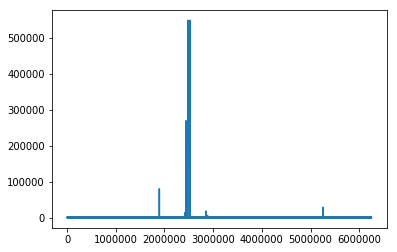

In [41]:
plt.plot(df['trip_duration'])

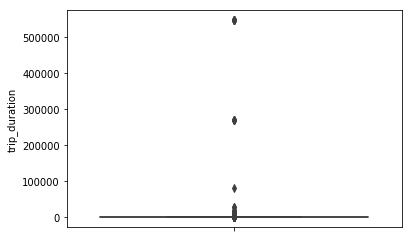

In [37]:
sns.boxplot(y="trip_duration", data =df)
plt.show()

##### From both the Plots above we can inferr that there are lot of outliers as maximum of trip duration that is allowable is 12*60 mins i.e 720 minutes, also there are lot of trip duration which are less than 0 i.e negative .Lets try to plot by not considering the outliers.

In [7]:
duration_wo_outlier=df[(df.trip_duration>1) & (df.trip_duration<720)]['trip_duration']

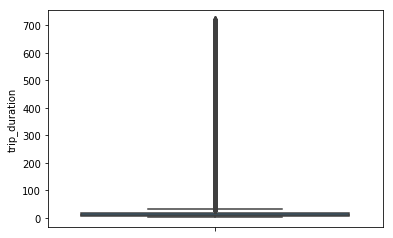

In [48]:
sns.boxplot(y=duration_wo_outlier)

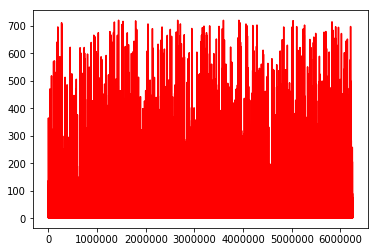

In [52]:
plt.plot(duration_wo_outlier,color='red')

In [8]:
df=df[(df.trip_duration>1) & (df.trip_duration<720)]

### 4. Speed

/home/chaitanya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


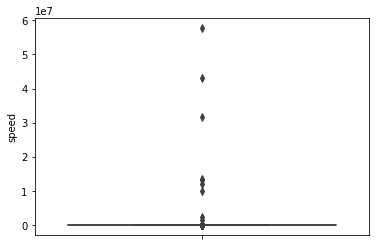

In [54]:
df['speed'] = 60*(df['trip_distance']/df['trip_duration'])
sns.boxplot(y="speed", data =df)
plt.show()

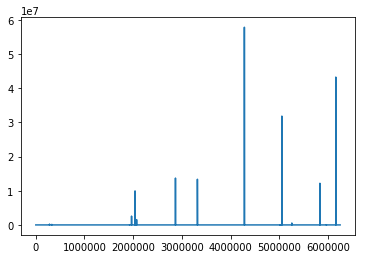

In [55]:
plt.plot(df['speed'])

Observation

In [64]:
var=np.percentile(df["Speed"].values,np.arange(0,101,10))
j=0
for i in var:
    print(j,"th percentile is:",i)
    j=j+10

0 th percentile is: 0.0
10 th percentile is: 6.3984375
20 th percentile is: 7.797833935018051
30 th percentile is: 8.915094339622643
40 th percentile is: 9.966101694915254
50 th percentile is: 11.052631578947368
60 th percentile is: 12.270096463022508
70 th percentile is: 13.776765375854215
80 th percentile is: 15.9404052443385
90 th percentile is: 20.164222873900293
100 th percentile is: 57787354.28571428


We can see here that our 90th percentile speed value is 20.17 mph which seems to be too low as per speed parameter is considered. Lets zoom in between 90th percentile and 100th percentile.

In [67]:
var=np.percentile(df["Speed"].values,np.arange(90,101,1))
j=90
for i in var:
    print(j,"th percentile is:",i)
    j=j+1

90 th percentile is: 20.164222873900293
91 th percentile is: 20.89119170984456
92 th percentile is: 21.724137931034484
93 th percentile is: 22.694932938379573
94 th percentile is: 23.811377787491402
95 th percentile is: 25.144615384615385
96 th percentile is: 26.77466863033873
97 th percentile is: 28.81239242685026
98 th percentile is: 31.55815472387114
99 th percentile is: 35.691299936549655
100 th percentile is: 57787354.28571428


We get here our 99th percentile speed value to be 35.7 mph which seems to good. But lets see if we can try to increase our speed threshold value by looking between 99th percentile and 100th percentile. 

In [75]:
var =df["Speed"].values
var = np.sort(var,axis = None)
for i in np.arange(0.0, 1.0, 0.1):
    print(99+i,"th percentile is:",var[int(len(var)*(float(99+i)/100))])
print("100 percentile value is ",var[-1])

99.0 th percentile is: 35.69131832797427
99.1 th percentile is: 36.25
99.2 th percentile is: 36.8625
99.3 th percentile is: 37.528301886792455
99.4 th percentile is: 38.26966292134832
99.5 th percentile is: 39.12357581069238
99.6 th percentile is: 40.11254924029263
99.7 th percentile is: 41.30456226880394
99.8 th percentile is: 42.84705882352941
99.9 th percentile is: 45.299777942264996
100 percentile value is  57787354.28571428


We can take 99.9th percentile speed value as our final threshold since 45.3 mph seems to be considerable speed in city of New York.

In [9]:
df=df[(df.Speed>0) & (df.Speed<45.3)]

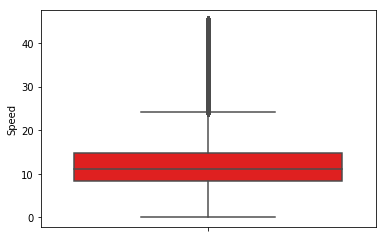

In [17]:
sns.boxplot(y=df['Speed'],color='red')

### 4. Trip Distance

In [34]:
print("Max distance that can be covered with max speed and with max trip duration is:",max(df['Speed'])/60*max(df['trip_duration']),"miles")

Max distance that can be covered with max speed and with max trip duration is: 543.4211695040711 miles


The maximum distance we can cover in 12 hrs with a speed 45.3 mph is 543.6 miles. In theory it's possible, but in real world we cannot travel that much distance without any real world constraints.

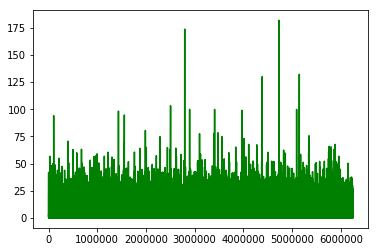

In [42]:
plt.plot(df.trip_distance,color='green')

Most of the data is densed between 0 to 27 miles and we can expect to find our distance threshold above 20 to remove outliers.

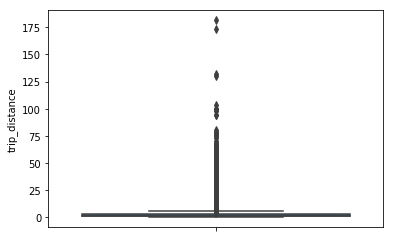

In [31]:
sns.boxplot(y="trip_distance", data =df)
plt.show()

In [45]:
var =df["trip_distance"].values
var = np.sort(var,axis = None)
for i in range(0,100,10):
     print(i,"th percentile is:",var[int(len(var)*(float(i)/100))])
print("100 percentile value is ",var[-1])

0 th percentile is: 0.01
10 th percentile is: 0.67
20 th percentile is: 0.9
30 th percentile is: 1.1
40 th percentile is: 1.39
50 th percentile is: 1.7
60 th percentile is: 2.08
70 th percentile is: 2.6
80 th percentile is: 3.6
90 th percentile is: 5.97
100 percentile value is  181.96


In [47]:
for i in range(90,100):
     print(i,"th percentile is:",var[int(len(var)*(float(i)/100))])
print("100 percentile value is ",var[-1])

90 th percentile is: 5.97
91 th percentile is: 6.45
92 th percentile is: 7.08
93 th percentile is: 7.85
94 th percentile is: 8.73
95 th percentile is: 9.6
96 th percentile is: 10.6
97 th percentile is: 12.1
98 th percentile is: 16.06
99 th percentile is: 18.17
100 percentile value is  181.96


In [53]:
#calculating trip distance values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(99.0, 100.0, 0.1):
    print(round(i,1),"th percentile is:",var[int(len(var)*(float(i)/100))])
print("100 th percentile is ",var[-1])

99.0 percentile value is 18.17
99.1 percentile value is 18.37
99.2 percentile value is 18.6
99.3 percentile value is 18.83
99.4 percentile value is 19.13
99.5 percentile value is 19.5
99.6 percentile value is 19.95
99.7 percentile value is 20.5
99.8 percentile value is 21.22
99.9 percentile value is 22.6
100 percentile value is  181.96


As we had expected we 22.6 can taken as the best threshold for the distance.

In [10]:
df=df[(df.trip_distance>0) & (df.trip_distance<22.6)]

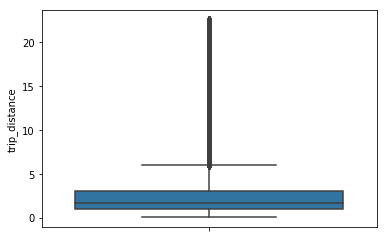

In [55]:
#box-plot after removal of outliers
sns.boxplot(y=df.trip_distance)
plt.show()

/home/chaitanya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


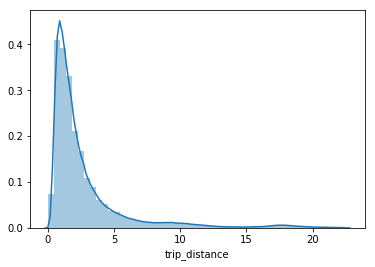

In [56]:
sns.distplot(df.trip_distance)

### 5. Total Fare

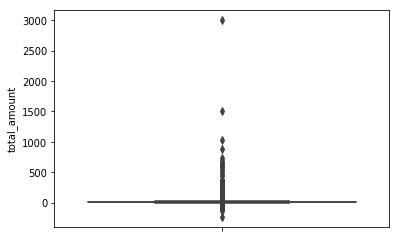

In [63]:
sns.boxplot(y="total_amount", data =df)
plt.show()

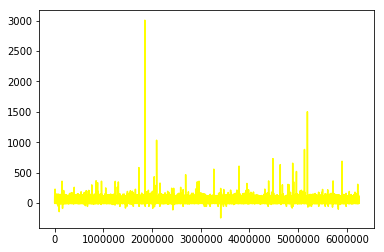

In [82]:
plt.plot(df.total_amount,color='yellow')

We can see that there are some values which are less than 0 and mostly data is densed between 0 to 500.

In [9]:
var = df["total_amount"].values
var = np.sort(var,axis = None)

In [105]:
for i in range(0,100,10):
     print(i,"th percentile is:",var[int(len(var)*(float(i)/100))])
print("100 percentile is ",var[-1])

0 th percentile is: -242.55
10 th percentile is: 6.36
20 th percentile is: 7.8
30 th percentile is: 8.8
40 th percentile is: 9.8
50 th percentile is: 11.16
60 th percentile is: 12.8
70 th percentile is: 14.8
80 th percentile is: 18.3
90 th percentile is: 25.8
100 percentile is  3006.35


In [106]:
for i in range(90,100):
     print(i,"th percentile is:",var[int(len(var)*(float(i)/100))])
print("100 percentile value is ",var[-1])

90 th percentile is: 25.8
91 th percentile is: 27.25
92 th percentile is: 29.1
93 th percentile is: 31.4
94 th percentile is: 34.56
95 th percentile is: 38.13
96 th percentile is: 42.13
97 th percentile is: 47.4
98 th percentile is: 57.3
99 th percentile is: 65.8
100 percentile value is  3006.35


In [107]:
for i in np.arange(99.0, 100.0, 0.1):
    print(round(i,1),"th percentile is:",var[int(len(var)*(float(i)/100))])
print("100 th percentile is ",var[-1])

99.0 th percentile is: 65.8
99.1 th percentile is: 67.13
99.2 th percentile is: 68.6
99.3 th percentile is: 69.6
99.4 th percentile is: 69.69
99.5 th percentile is: 69.73
99.6 th percentile is: 69.76
99.7 th percentile is: 72.46
99.8 th percentile is: 74.8
99.9 th percentile is: 86.38
100 th percentile is  3006.35


The 99.9th percentile value doesnt look like an outlier.

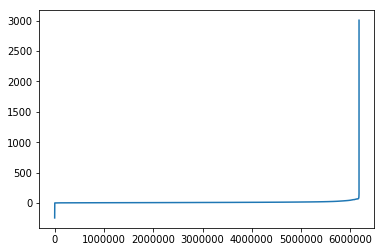

In [111]:
plt.plot(var)
plt.show()

In [64]:
len(var[var>200])

66

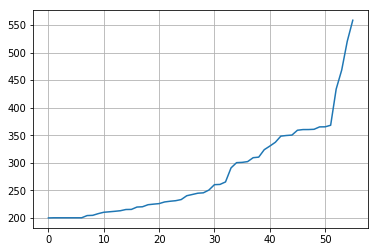

In [92]:
plt.plot(var[-66:-10])
plt.grid()

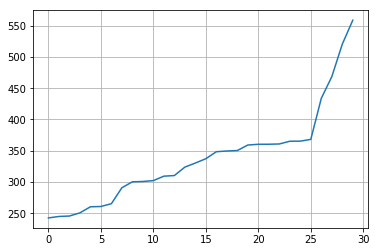

In [91]:
plt.plot(var[-40:-10])
plt.grid()

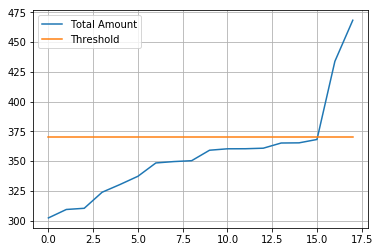

In [85]:
plt.plot(var[-30:-12],label='Total Amount')
thresh=np.zeros_like(var)
thresh=thresh+370
plt.plot(thresh[-30:-12],label='Threshold')
plt.legend()
plt.grid()

Since the total amount values are graduall increasing till 375 and once it reaches 375 it drastically increases indicating outliers above.

In [11]:
df=df[(df.total_amount>0) & (df.total_amount<=375)]

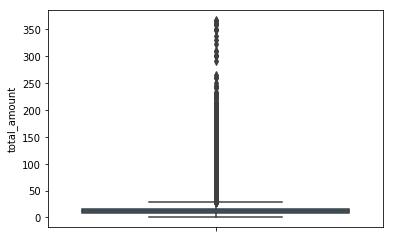

In [94]:
sns.boxplot(y=df.total_amount)

In [12]:
df.to_csv('./trip_data_wo_outlier')

# Exploratory data analysis

In [2]:
df=pd.read_csv('./trip_data_wo_outlier')

In [3]:
temp=pd.DatetimeIndex(df['tpep_pickup_datetime'])

In [4]:
Day=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

## 1. Visualizing the pickup's with respect to the day in a week

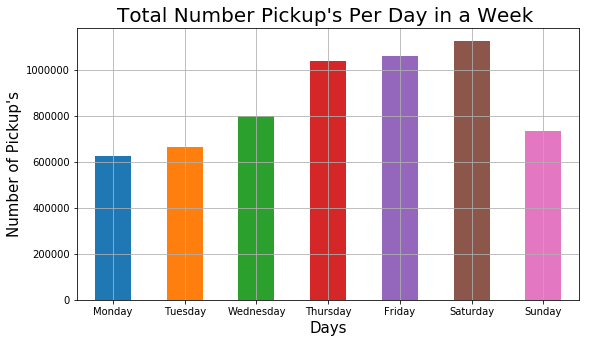

In [5]:
plt.figure(figsize=(9,5))
temp.dayofweek.value_counts().sort_index().plot(kind='bar')
plt.xticks(list(range(0,7)),Day,rotation=0)
plt.title("Total Number Pickup's Per Day in a Week ",size=20)
plt.xlabel('Days',size=15)
plt.ylabel('Number of Pickup\'s',size=15)
plt.grid()
plt.show()

<b>Observation: </b> <p>Taxi cab booking shows a gradual increase from Monday to Thursday. It can be observed that from Thurday till Saturday there is good no of bookings.</p><p> On Saturday people often go out a lot for shopping, parties or family function, so there is maximum no of bookings on Saturday. On sundays people often rest at home or spend family time at home so there is considerable less no of bookings on Sunday, as Number of Bookings falls with a faster rate from Saturday to Sunday.</p>

## 2. Visualizing the comparison of day and the revenue collected on that particular day of the week

In [6]:
df['Day']=temp.weekday

In [7]:
group_x=df[['total_amount','Day']].groupby(by='Day')

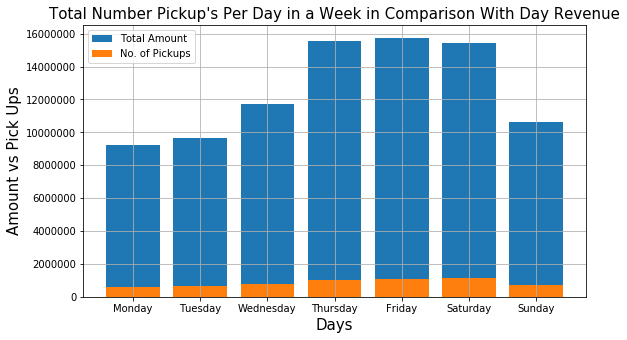

In [8]:
plt.figure(figsize=(9,5))
plt.bar(Day,group_x.sum()['total_amount'],label='Total Amount')
plt.bar(Day,group_x.count()['total_amount'],label='No. of Pickups')
plt.title("Total Number Pickup's Per Day in a Week in Comparison With Day Revenue",size=15)
plt.legend()
plt.xlabel('Days',size=15)
plt.ylabel('Amount vs Pick Ups',size=15)
plt.yticks(list(range(0,18000000,2000000)),list(range(0,18000000,2000000)))
plt.grid()
plt.show()

<b>Observation: </b><p>It is very clear as the No of Cab bookings increases, buisnsess on respective day's also increases.</p>
<p>If we observe although No of bookings on Thursday and Friday are less than Saturday, still Saturday has quite less business than Thursaday and Friday.</p> 

## 3. Visualization of how the number of pickups differs daywise in month of january 2015

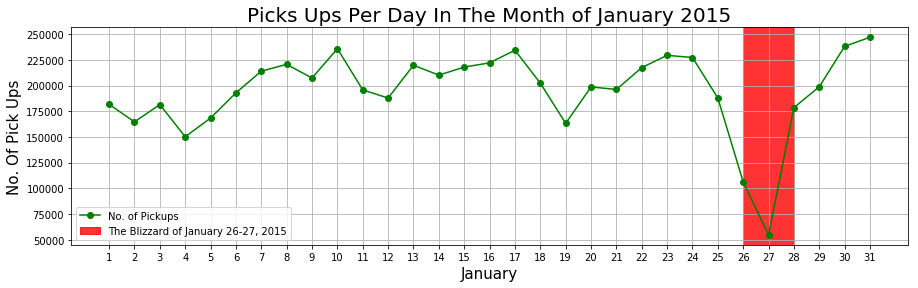

In [9]:
plt.figure(figsize=(15,4))
plt.plot(temp.day.value_counts().sort_index(),color='green',label='No. of Pickups',marker='o')
plt.xticks(np.arange(1,32,1))
plt.axvspan(26, 28, color='red', alpha=0.8,label='The Blizzard of January 26-27, 2015')
plt.title('Picks Ups Per Day In The Month of January 2015',size=20)
plt.legend()
plt.xlabel('January',size=15)
plt.ylabel('No. Of Pick Ups',size=15)
plt.grid()
plt.show()

<b>Observation: </b><p>We observe similar pattern across January month about No of bookings increasing from  Monday to Saturday and again falling on Sunday.</p><p>On 26th and 27th of January 2015 we see a great decline in No of Cab bookings as on those days New York city faced a powerful and severe blizzard that dumped up to 3 feet of snowfall</p>

## 4.Visualizing the peak hours, off hours and average hours for the pickup in a month of january 2015

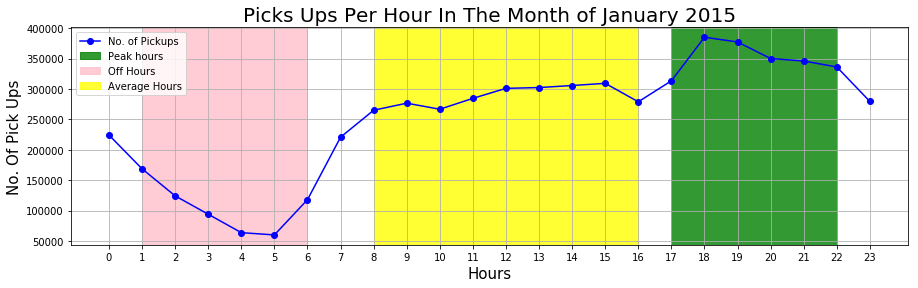

In [10]:
plt.figure(figsize=(15,4))
plt.plot(temp.hour.value_counts().sort_index(),marker='o',color='blue',label='No. of Pickups')
plt.axvspan(17,22, color='green', alpha=0.8,label='Peak hours')
plt.axvspan(1,6, color='pink', alpha=0.8,label='Off Hours')
plt.axvspan(8,16, color='yellow', alpha=0.8,label='Average Hours')
plt.xticks(np.arange(0,24,1))
plt.title('Picks Ups Per Hour In The Month of January 2015',size=20)
plt.legend()
plt.xlabel('Hours',size=15)
plt.ylabel('No. Of Pick Ups',size=15)
plt.grid()
plt.show()

<b>Observation: </b><p>Rise in Cab booking's starts from Morning 7 am there is constant no of booking's till 5 pm. As it reaches 4 pm there is a hike in Cab bookings that is till 6 pm and this hike remains constant till 10 pm, because these are the hours which are after working hour's of various businesses, so there is lot of demand for Cabs during this period.</p>

## 5.Plot for comparison of pickup's and tip amount on a particular day of the week

In [11]:
tip_temp=df[['tip_amount','Day','tpep_pickup_datetime']]

In [24]:
group_tip=tip_temp.groupby('Day')

In [25]:
cnt=group_tip.count()['tip_amount']
amt=group_tip.sum()['tip_amount']

In [22]:
cnt=(cnt-min(cnt))/(max(cnt)-min(cnt))
amt=(amt-min(amt))/(max(amt)-min(amt))

In [26]:
cnt=cnt.sort_index()
amt=amt.sort_index()

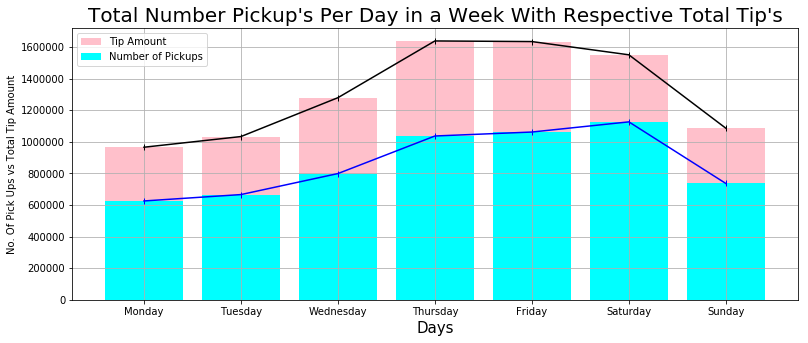

In [27]:
plt.figure(figsize=(13,5))
plt.bar(Day,amt,color='pink',label='Tip Amount')
plt.plot(cnt,marker='|',color='blue',label='')
plt.plot(amt,marker='|',color='black',label='')
plt.bar(Day,cnt,color='aqua',label='Number of Pickups')
plt.title("Total Number Pickup's Per Day in a Week With Respective Total Tip's",size=20)
plt.legend()
plt.xlabel('Days',size=15)
plt.ylabel('No. Of Pick Ups vs Total Tip Amount',size=10)
plt.grid()
plt.show()

<b>Observation: </b><p>Tip Amount collected on respective Day is directly proportional to Cab bookings. But on saturady and sunday tip amount collected is too less in comparison with other days of the week.</p>

## 6. Pie Chart for the comparison of vendors for the yellow taxis in New York

In [28]:
var=list(df.VendorID.value_counts().sort_index().values)
var

[2860870, 3189717]

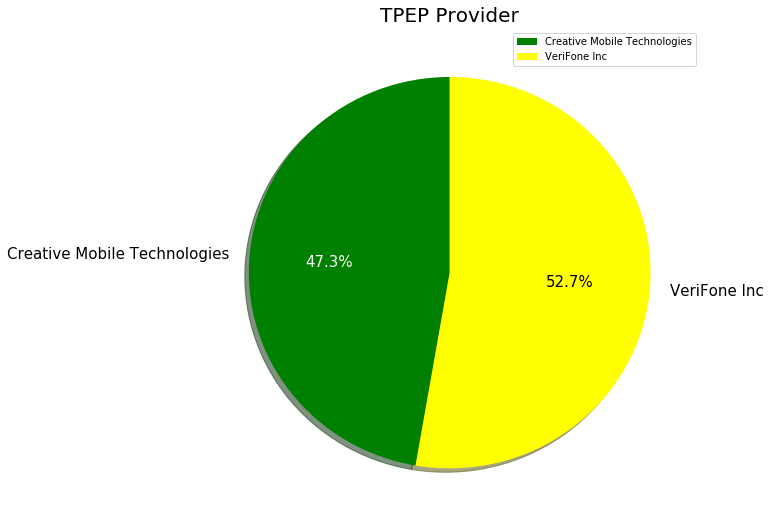

In [29]:
plt.figure(figsize=(9,9))
p,t,a=plt.pie(var,labels=['Creative Mobile Technologies','VeriFone Inc'],startangle=90, autopct='%.1f%%',shadow=True,colors=['green','yellow'])
plt.legend()
t[0].set_fontsize(15)
t[1].set_fontsize(15)
a[0].set_fontsize(15)
a[1].set_fontsize(15)
a[0].set_color('white')
a[1].set_color('black')
plt.title('TPEP Provider',size=20)
plt.show()

<b>Observation: </b><p>TPEP provided by Creative Mobile Technologies and VeriFone Inc, both providers hold almost a massive equal proportion.</p><p>Although Verifone's TPEP has slightly more number than Creative Mobile Technologies.</p><p>It can be inferred that there is tough competition between the both.</p>

## 7. Visualizing how many customers charged by the standard rates and the others. 

In [45]:
var=df.RateCodeID.value_counts().sort_values()

var2=[var[1],sum(var[:-1])]
var2

[5946012, 104575]

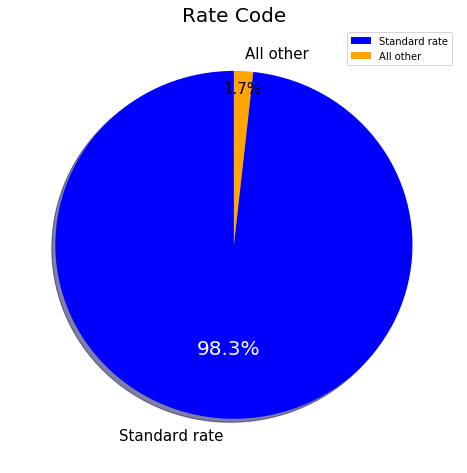

In [48]:
plt.figure(figsize=(8,8))
p,t,a=plt.pie(var2,labels=['Standard rate','All other'],startangle=90, autopct='%.1f%%',shadow=True,colors=['blue','orange'])
t[0].set_fontsize(15)
t[1].set_fontsize(15)
a[0].set_fontsize(20)
a[1].set_fontsize(15)
a[0].set_color('white')
plt.title('Rate Code',size=20)
a[1].set_position((0.05,0.9))
plt.legend()
plt.show()

<b>Observation: </b><p>Almost 98 % of trip rides have charged customer's with standard rate.</p>

## 8.Pie Chart for the comparison of mode of payment

In [50]:
var=df.payment_type.value_counts()
var2=[var[1],var[2],sum(var[3:])]
var2

[3759700, 2275207, 3612]

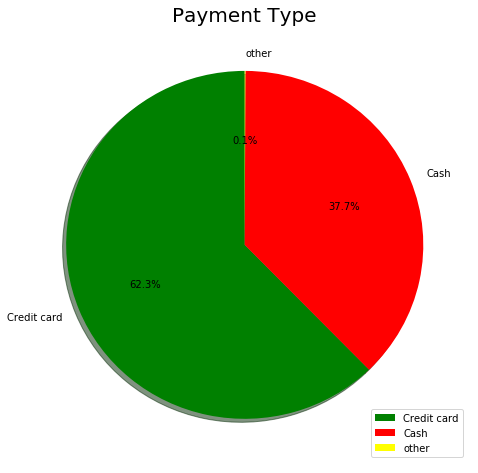

In [51]:
plt.figure(figsize=(8,8))
plt.pie(var2,labels=['Credit card','Cash','other'],startangle=90, autopct='%.1f%%',shadow=True,colors=['green','red','yellow'])
plt.title('Payment Type',size=20)
plt.legend()
plt.show()

<b>Observation: </b><p>Customers making payment by credit card is more than customers making payment by cash</p><p>Focus should made on providing more swipping machine's to cab driver's</p>

## 9.Heat map for comparison of correlation between the some parameters

In [280]:
corr=df[['passenger_count','trip_distance','mta_tax','tip_amount','tolls_amount','total_amount','Day']].corr()

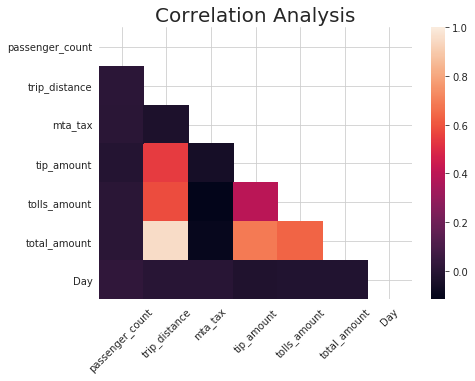

In [274]:
plt.figure(figsize=(7,5))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr,mask=mask)
plt.title('Correlation Analysis',size=20)
plt.xticks(rotation=45)
plt.grid()

<b>Observation: </b><br><p>Following Attributes are highly correlated:</p>

<table align='left'>
<tr>
    <td>Total Amount</td>
    <td>Trip Distance</td>
<tr>
<tr>
    <td>Toll's Amount</td>
    <td>Trip Distance</td>
<tr>
<tr>
    <td>Tip's Amount</td>
    <td>Trip Distance</td>
<tr>
<tr>
    <td>Total Amount</td>
    <td>Tip's Amount</td>
<tr>
<tr>
    <td>Total Amount</td>
    <td>Toll's Amount</td>
<tr>

</table><br><br><br><br><br><br><br><br>
<p>All the above are highly correlated and all our trivial</p>


























